# Image augmentation

In [2]:
import os
import sys

import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
sys.path.append("../..")
from cvnet.figure import plt, use_svg_display, set_figsize,show_images


!pwd

/Users/xuming06/Codes/cvnet


In [3]:
img = Image.open('./docs/7.jpg')

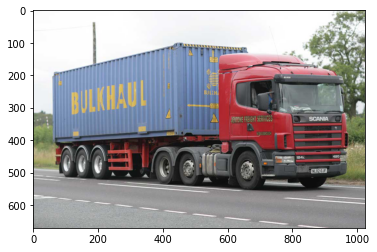

In [4]:
plt.imshow(img)

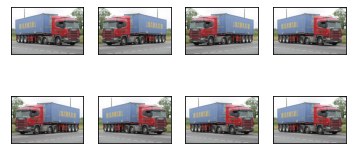

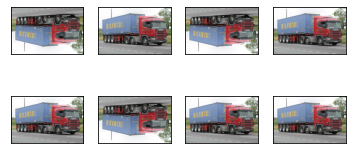

In [6]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for i in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

# 左右翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

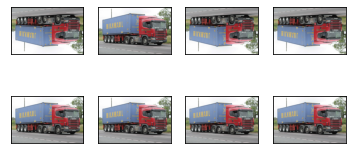

In [7]:
apply(img, torchvision.transforms.RandomVerticalFlip())

## 裁剪
我们每次随机裁剪出一块面积为原面积10%∼100%的区域，且该区域的宽和高之比随机取自0.5∼2，然后再将该区域的宽和高分别缩放到200像素。若无特殊说明，本节中aa和bb之间的随机数指的是从区间[a,b]中随机均匀采样所得到的连续值。



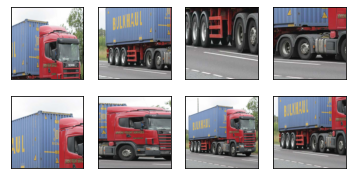

In [8]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## 变化颜色

另一类增广方法是变化颜色。我们可以从4个方面改变图像的颜色：亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。

在下面的例子里，我们将图像的亮度随机变化为原图亮度的50%∼150%。

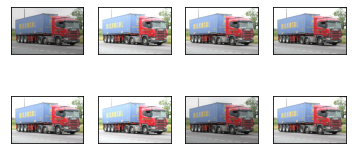

In [9]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

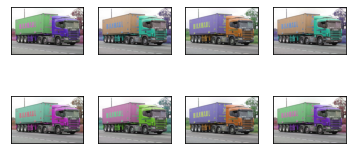

In [10]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

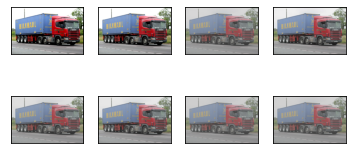

In [11]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

我们也可以同时设置如何随机变化图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。

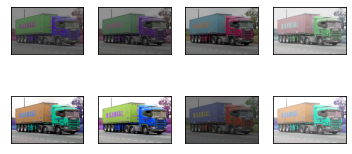

In [12]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 叠加多个图像增广方法
实际应用中我们会将多个图像增广方法叠加使用。我们可以通过Compose实例将上面定义的多个图像增广方法叠加起来，再应用到每张图像之上。

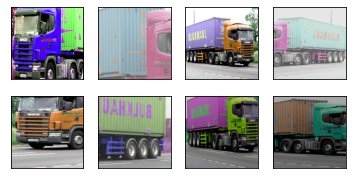

In [13]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

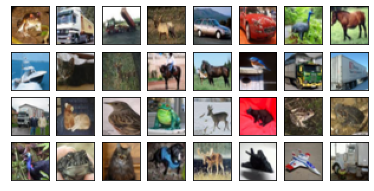

In [14]:
all_imges = torchvision.datasets.CIFAR10(train=True, root="~/.pytorch/datasets/CIFAR10", download=True)
# all_imges的每一个元素都是(image, label)
show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8)